# What sells a car?

In this project we will analyze the hundreds of free vehicle advertisements published on the Eixo de Manivela website every day. We need to study the data collected over the last few years and determine what factors influenced the price of a vehicle.

We will analyze the provided data set and the possible new columns that we can form with them.

Let's look for outliers, missing and duplicates, enriching the data with new numeric columns coming from categorical columns, as well as looking for relationships between these columns, mean, median, maximum and minimum values.

Finally, we will perform an exploratory data analysis with graphs and correlation matrices.

## Initiation

Let's load the libraries we believe are needed for this project.

In [1]:
# Loading all libraries

import pandas as pd

import matplotlib.pyplot as plt

### Loading data

In [2]:
# Loading the file with the data into a DataFrame

df = pd.read_csv('/datasets/vehicles_us.csv')

### Exploring the initial data

The initial dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasoline, diesel, etc.
- `odometer` — the mileage of the vehicle when the advertisement was published
- `transmission`
- `paint_color`
- `is_4wd` — If the vehicle is 4 by 4 (Boolean type)
- `date_posted` — the date the ad was posted
- `days_listed` — days from publish to withdraw

In [3]:
# Printing statistical table descriptions

df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# Printing the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# Printing a sample of the data

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


When looking at this first impression of the data with `.head`, basic statistics with `.describe` and table information with `.info` we could already see that some columns have inappropriate data types, others have missing values and some have values unexpected events, like a car that costs $1.

We will analyze them in more detail later.

Specifically regarding data types, at first we noticed that **dates** are not well presentable in text format, as well as **year counts** are easier with integers.

We will soon direct our focus to these.

Let's start by looking on the bright side: how many columns we have and how many don't have missing values:

In [6]:
# Counting the total number of columns

df.shape[1]

13

In [7]:
# Printing only column names that have no missing values

df.columns[df.notna().all()]

Index(['price', 'model', 'condition', 'fuel', 'transmission', 'type',
       'date_posted', 'days_listed'],
      dtype='object')

We could observe that of the 13 columns, 8 are already completely filled!

In [8]:
# Checking which columns have how many null values

df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
# Let's investigate the percentage of null values in `is_4wd` compared to the total dataset

df['is_4wd'].isna().sum() / len(df) * 100

50.36972343522562

It seems that more than half of the four-wheel drive data is missing.

We will need to investigate this further, let's count the values in this column and group the missing ones by `type` to identify if they are related to the type of car to take any action, as 50% is a considerably high value to remove.

In [10]:
# Checking what other values in column 'is_4wd' besides 1.0

df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

When counting how many units we have of each value in the `is_4wd` column, we would expect that some rows would display `1.0` (meaning they are driven cars) while others would display `0`, indicating that the car only has traction on one axle. However, the "value_counts()" method confirmed that all the data present in the `is_4wd` column is `1.0`.

That is, as we don't have rows indicating cars with drive on only one axle, there was probably an error that counted `0` data as missing.

Let's just look at a sample grouping of car models that feature NaN to see if they wouldn't normally be `4wd`.

In [11]:
# Checking the number of rows missing values in column 'is_4wd'

len(df[df['is_4wd'].isna()])

25953

In [12]:
# Grouping cars with NaN value in 'is_4wd' by 'type'

df[df['is_4wd'].isna()].groupby('type').count()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,paint_color,is_4wd,date_posted,days_listed
type,,,,,,,,,,,,
SUV,3552,3290,3552,3552,3201,3552,2978,3552,2892,0,3552,3552
bus,24,24,24,24,20,24,23,24,19,0,24,24
convertible,393,370,393,393,360,393,340,393,326,0,393,393
coupe,2227,2089,2227,2227,2012,2227,1900,2227,1833,0,2227,2227
hatchback,887,828,887,887,783,887,774,887,702,0,887,887
mini-van,1122,1040,1122,1122,997,1122,962,1122,928,0,1122,1122
offroad,8,8,8,8,7,8,7,8,7,0,8,8
other,130,117,130,130,111,130,114,130,112,0,130,130
pickup,1962,1820,1962,1962,1751,1962,1651,1962,1609,0,1962,1962


When counting `type` within a filter of 25953 missing values in `is_4wd`, we would expect that for **"pick-up"** types not many units would appear, since, despite the existence of **pick-ups without 4wd **, usually most have drive on both axles.

But great! For a sample of more than 50,000 data, 1962 pick-ups without 4wd would be normal.

In section 1.2 we will focus individually on the 5 columns that need to be filled.

**Outliers**: let's create the `number_columns` filter to take a look at the minimum, average, median and maximum values of each numeric column, we'll pay attention to possible outliers/isolated values and we can use it again later, if we do changes to these values.

In [13]:
number_columns = df.filter(['days_listed', 'date_posted', 'odometer', 'cylinders', 'model_year', 'price'])

number_columns = number_columns.agg(['min', 'mean', 'median', 'max'])

number_columns


,days_listed,date_posted,odometer,cylinders,model_year,price
min,0.00000,2018-05-01,0.000000,3.000000,1908.00000,1.00000
mean,39.55476,NaN,115553.461738,6.125235,2009.75047,12132.46492
median,33.00000,NaN,113000.000000,6.000000,2011.00000,9000.00000
max,271.00000,2019-04-19,990000.000000,12.000000,2019.00000,375000.00000


It's worth taking a closer look at the min and max changes for the `odometer`, `model_year` and `price` columns.

Note some details in the conclusions below.

### Conclusions and next steps

In this first section we make the following observations to perform specific steps:

- columns appear to be **appropriately named**, no changes required


- to facilitate data manipulation, we will convert the `model_year`, `cylinders` and `is_4wd` columns to **data type** integer, as well as the `date_posted` column to datetime


- among the **missing values** that we need to study more closely, we already know that those in the `is_4wd` column will be replaced by `0`, indicating cars without 4wd

Some observations about questionable values:

- `days_listed` and `date_posted` show plausible dates, considering a period of less than 1 year of listings;


- For cars with `odometer` equal to zero, it is worth checking if they are really recently produced models, as well as high mileage values, such as 990,000, if they are old cars, since they could have driven almost 25 laps around the planet Earth;


- Despite being in "float" instead of "integer", the `cylinders` column seems to be well organized and tabulated, since it is not expected to find frequently vehicles with more than 12 cylinders;


- As for the `model_year` and `year` columns, the maximums do not bring as much concern as their minimums, so perhaps it is worth analyzing these values and others nearby, relating them to other variables.

## Taking care of missing values

### Missing values in column `is_4wd`

As we analyzed earlier, we interpreted that the 0 values were interpreted as NaN.

Therefore, we will use the fillna method for this purpose:

In [14]:
# Replacing missing values in 'is_4wd' with zero

df['is_4wd'].fillna(0, inplace=True)

# Checking the count of values in this column

df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

### Missing values in column `model_year`

Let's remember how many missing values we have in the `model_year` column and analyze a small statistical description of these data.

In [15]:
# Counting the number of missing values in column 'model_year'

df['model_year'].isna().value_counts()

False    47906
True      3619
Name: model_year, dtype: int64

In [16]:
# Understanding a little the data distribution in the 'model_year' column

df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Although, theoretically, we are dealing with a variation of 110 years. Apparently more than half of the cars listed are within the last 10 years of production.

Anyway, to avoid *replace* NaN values based on wrong means or medians, we need to study the extremes of the `model_year` column and see if anything can be swapped or removed.

In [17]:
# First we will filter a dataframe with first year, last year and number of years of manufacture

cars_first_last = df[['model', 'model_year']].groupby('model')['model_year'].agg(['min', 'max']).rename(columns={'min': ' first_year', 'max': 'last_year'})

cars_first_last['production_years'] = cars_first_last['last_year'] - cars_first_last['first_year']

cars_first_last

,first_year,last_year,production_years
model,,,
acura tl,1999.0,2014.0,15.0
bmw x5,2001.0,2018.0,17.0
buick enclave,2008.0,2018.0,10.0
cadillac escalade,1908.0,2019.0,111.0
chevrolet camaro,1967.0,2019.0,52.0
...,...,...,...
toyota sienna,1998.0,2019.0,21.0
toyota tacoma,1989.0,2019.0,30.0
toyota tundra,2000.0,2018.0,18.0


By doing a little research, we can find that, historically, the car with the most years of manufacture was the Beetle, with 70, between the years 1938 to 2003. If it is present in our data, or not, we will now filter those that are above this value.

In [18]:
# Selecting columns that group cars with more than 70 years of manufacture

cars_first_last.query('production_years > 70')

,first_year,last_year,production_years
model,,,
cadillac escalade,1908.0,2019.0,111.0
chevrolet impala,1948.0,2019.0,71.0
ford f-150,1929.0,2019.0,90.0
gmc yukon,1908.0,2018.0,110.0


Now yes, now that we have a selection of 4 models, we can:

- research which was the real first year of production of each one


- filter `df` with all these cars that appear below their true year of production


- check possible typing errors or the need to remove these values.

In [19]:
# Filtering outliers for analysis

wrong_years = df.query("(model == 'cadillac escalade' and model_year < 1998) or \
           (model == 'chevrolet impala' and model_year < 1958) or \
           (model == 'ford f-150' and model_year < 1948) or \
           (model == 'gmc yukon' and model_year < 1992)")

wrong_years

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,0.0,2019-01-18,24
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0.0,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,0.0,2018-11-22,10
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


How good that there are only 5 vehicles!

In [20]:
# Calculating the representative percentage of these outliers in relation to the total set

len(wrong_years) / len(df) * 100

0.009704027171276079

They make up less than 1% of our data.

But as they are "outliers", we will remove them so that they do not interfere with the replacement of missing values.

Next, we print `wrong_years` and `df` again, to check if they turned out exactly as expected.

In [21]:
# Confirming the number of rows

df.shape

(51525, 13)

In [22]:
# Configuring our DataFrame without the outliers so that they don't interfere with the means/medians that will replace the missing values

df = df.drop(index=wrong_years.index)

In [23]:
# Confirming that this data is still present

wrong_years = df.query("(model == 'cadillac escalade' and model_year < 1998) or \
           (model == 'chevrolet impala' and model_year < 1958) or \
           (model == 'ford f-150' and model_year < 1948) or \
           (model == 'gmc yukon' and model_year < 1992)")

wrong_years

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [24]:
# Counting the DataFrame, hoping it is not already the same size

df.shape

(51520, 13)

In [25]:
# Sorting the "new" DataFrame by the oldest cars, to see if they make sense or not

df.sort_values('model_year', ascending=True).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,NaN,0.0,2018-08-11,10


Alright.

Now we can group `df` by `model` and fill in the missing values in `model_year` by the median of each `model` group.

In [26]:
# Grouping the data by model and calculating the median of the 'model_year' column for each group

median_years_by_model = df.groupby('model')['model_year'].transform('median')

# Replace the NaN values of the 'model_year' column with the median value of the models for the corresponding 'model' group

df['model_year'].fillna(median_years_by_model, inplace=True)

In [27]:
if df['model_year'].isna().any():
     print("Column 'model_year' still contains NaN values.")

else:
     print("Yeay! Column 'model_year' no longer contains NaN values!")

Yeay! A coluna 'model_year' não contém mais valores NaN!


### Missing values in column `cylinders`

While there are some exceptions to this general rule, we estimate that smaller or economy cars typically have three or four cylinder engines, while larger vehicles like trucks and SUVs can have six, eight, or even more cylinders.

Let's first look at the common values in the `type` column and the values in the `cylinders` column and then look for any trends and maybe replace the missing values in `cylinders` based on the type of car.

In [28]:
# Counting values of column 'type'

df['type'].value_counts()

SUV            12403
truck          12353
sedan          12153
pickup          6987
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            255
offroad          214
bus               24
Name: type, dtype: int64

In [29]:
# Statistically analyzing the 'cylinders' column

df['cylinders'].describe()

count    46260.000000
mean         6.125076
std          1.660358
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [30]:
# Counting the number of cars by the number of cylinders

df['cylinders'].value_counts()

8.0     15840
6.0     15699
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

We can observe, at a minimum, that:

- the number of cylinders of a means of transport should be considered whole units

- in our dataset most cars have 8, 6 or 4 cylinders

- among car types, most are SUV, truck or sedan

Let's group them by `type` and calculate the mean and median of cylinders for each type.

In [31]:
# Creating a pivot table to calculate the median and average number of cylinders for each type

df.pivot_table(index='type', values='cylinders', aggfunc=['median', 'mean'])

,median,mean
,cylinders,cylinders
type,,
SUV,6.0,5.904643
bus,10.0,9.100000
convertible,8.0,6.963415
coupe,6.0,6.451225
hatchback,4.0,4.159215
mini-van,6.0,5.966151
offroad,6.0,6.177083
other,6.0,5.678571


It is evident that we do not have discrepant values in number of cylinders for each type of car, since for all types, the mean and the median are very approximate values.

When using *aggfunc* with the *pivot_table()* method in Pandas, by default it ignores missing values when performing aggregation calculations.

That is, knowing that the NaN values were not accounted for and we now have a mean and median for their types, we will replace them with the medians according to `type`.

In [32]:
# Grouping the data by type and calculating the median of the 'cylinders' column for each group

median_cylinders_by_type = df.groupby('type')['cylinders'].transform('median')

# Replace the NaN values of the 'cylinders' column with the median value of the cylinders for the corresponding 'type' group

df['cylinders'].fillna(median_cylinders_by_type, inplace=True)

Theoretically, the number of non-NaN values has increased, so the mean is expected to change slightly.

However, we hope not to have interfered with the median values by `type`. We will see:

In [33]:
# Checking if the medians and means remain the same

df.pivot_table(index='type', values='cylinders', aggfunc=['median', 'mean'])

,median,mean
,cylinders,cylinders
type,,
SUV,6.0,5.914053
bus,10.0,9.250000
convertible,8.0,7.047085
coupe,6.0,6.407729
hatchback,4.0,4.139446
mini-van,6.0,5.969854
offroad,6.0,6.158879
other,6.0,5.717647


Do we still have missing values in `cylinders`?

In [34]:
if df['cylinders'].isna().any():
     print("Column 'cylinders' still contains NaN values.")

else:
     print("Yeay! Column 'cylinders' no longer contains NaN values!")

Yeay! A coluna 'cylinders' não contém mais valores NaN!


### Valores ausentes na coluna `odometer`

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51520 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51520 non-null  int64  
 1   model_year    51520 non-null  float64
 2   model         51520 non-null  object 
 3   condition     51520 non-null  object 
 4   cylinders     51520 non-null  float64
 5   fuel          51520 non-null  object 
 6   odometer      43630 non-null  float64
 7   transmission  51520 non-null  object 
 8   type          51520 non-null  object 
 9   paint_color   42253 non-null  object 
 10  is_4wd        51520 non-null  float64
 11  date_posted   51520 non-null  object 
 12  days_listed   51520 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


43630 non-null values. That is, almost 8 thousand nulls.

Before we decide how to replace or remove missing values from the `odometer` column let's print them out to see if we can find any patterns yet.

In [36]:
# Searching for missing values in 'odometer'

df.query('odometer.isna()')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


A variable/column that could be more directly linked with "odometer" is "model_year". A vehicle's model year can often be a good indicator of its wear and tear, as cars tend to accumulate more miles as they age.

Let's try to check some correlation of these two variables, to possibly group based on these conditions to replace the missing values.

In [37]:
# Counting the values of 'condition' to understand them a little better

df['condition'].value_counts()

excellent    24771
good         20143
like new      4741
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [38]:
# Creating a new column (condition_id) in 'df':
# to identify 'condition' values with numbers
# to facilitate the search for correlations


condition_id = {'salvage': 1, 'fair': 2, 'good': 3, 'excellent': 4, 'like new': 5, 'new': 6}

df['condition_id'] = df['condition'].map(condition_id)

In [39]:
# Looking for correlations between the condition of the car and its mileage

df['condition_id'].corr(df['odometer'])

-0.29637235389651123

Good. Changes to `condition` don't seem to necessarily be linked with `odometer`. Perhaps we can notice this today in a society full of app cars, which, despite looking new, run all day.

But let's do this same process for `fuel`, `transmission` and `type`, since they are also variables that we need to check some kind of relationship.

**Fuel**

In [40]:
# Counting the values of 'fuel' to understand them a little better

df['fuel'].value_counts()

gas         47283
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [41]:
# Creating a new column (fuel_id) in 'df':
# to identify 'fuel' values with numbers
# to facilitate the search for correlations


fuel_id = {'electric': 1, 'other': 2, 'hybrid': 3, 'diesel': 4, 'gas': 5}

df['fuel_id'] = df['fuel'].map(fuel_id)

df['fuel_id'].corr(df['odometer'])

-0.10640636870999391

Fuel has even less correlation with `odometer`. Go to `transmission`

**Transmission**

In [42]:
# Counting the values of 'transmission' to understand them a little better

df['transmission'].value_counts()

automatic    46899
manual        2827
other         1794
Name: transmission, dtype: int64

In [43]:
# Creating a new column (transmission_id) in 'df':
# to identify 'fuel' values with numbers
# to facilitate the search for correlations


transmission_id = {'other': 1, 'manual': 2, 'automatic': 3}

df['transmission_id'] = df['transmission'].map(transmission_id)

df['transmission_id'].corr(df['odometer'])

0.1411751650390151

Apparently, transmission has no correlation with `odometer`, when someone likes to drive, it goes far, regardless if it is manual or automatic transmission. Let's go to `type`.

**Type**

In [44]:
# Counting the values of 'type' to understand them a little better

df['type'].value_counts()

SUV            12403
truck          12353
sedan          12153
pickup          6987
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            255
offroad          214
bus               24
Name: type, dtype: int64

In [45]:
# Creating a new column (type_id) in 'df':
# to identify 'fuel' values with numbers
# to facilitate the search for correlations


type_id = {'bus': 1, 'offroad': 2, 'other': 3, 'convertible': 4, 'van': 5, 'hatchback': 6, 'mini-van': 7, 'wagon' : 8, 'coupe': 9, 'pickup': 10, 'sedan': 11, 'truck': 12, 'SUV': 13}

df['type_id'] = df['type'].map(type_id)

df['type_id'].corr(df['odometer'])

0.04306220488432607

It seems that the type of car (`type`) has no direct relation to how far it has been driven.

So let's analyze a matrix that allows us to observe which other variables may have a greater correlation with `odometer`

In [46]:
# Generating a correlation matrix to analyze the possible dependencies between the variables

df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,fuel_id,transmission_id,type_id
price,1.000000,0.417171,0.303709,-0.420319,0.315183,-0.000694,0.221519,-0.205626,-0.061884,0.047176
model_year,0.417171,1.000000,-0.142890,-0.464218,0.038117,-0.005792,0.272451,0.011805,-0.032002,0.066457
cylinders,0.303709,-0.142890,1.000000,0.089339,0.414020,0.002943,-0.063409,-0.095124,-0.049698,0.094564
odometer,-0.420319,-0.464218,0.089339,1.000000,0.036220,0.003755,-0.296372,-0.106406,0.141175,0.043062
is_4wd,0.315183,0.038117,0.414020,0.036220,1.000000,0.001972,0.012879,-0.100455,0.008091,0.269588
days_listed,-0.000694,-0.005792,0.002943,0.003755,0.001972,1.000000,-0.002360,0.003964,0.007764,-0.001821
condition_id,0.221519,0.272451,-0.063409,-0.296372,0.012879,-0.002360,1.000000,-0.008887,0.098793,0.028477
fuel_id,-0.205626,0.011805,-0.095124,-0.106406,-0.100455,0.003964,-0.008887,1.000000,-0.022236,0.052213
transmission_id,-0.061884,-0.032002,-0.049698,0.141175,0.008091,0.007764,0.098793,-0.022236,1.000000,0.127653
type_id,0.047176,0.066457,0.094564,0.043062,0.269588,-0.001821,0.028477,0.052213,0.127653,1.000000


Let's say that the least worst would be `model_year`, with Pearson's Correlation 0.4, but it's still very low.

To make a good replacement of the missing values in this variable, we only have one option left:

Find an average mileage per year for each car and then replace the missing ones according to how old they are.

Let's do it.

In [47]:
# Grouping the data by model and calculating the median of the 'odometer' column for each model

median_odometer_by_model = df.groupby('model')['odometer'].transform('median')


# Replacing the NaN values of the 'odometer' column with the median value of the models for the corresponding 'model' group

df['odometer'].fillna(median_odometer_by_model, inplace=True)

In [48]:
# Checking what still needs to be done

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51520 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            51520 non-null  int64  
 1   model_year       51520 non-null  float64
 2   model            51520 non-null  object 
 3   condition        51520 non-null  object 
 4   cylinders        51520 non-null  float64
 5   fuel             51520 non-null  object 
 6   odometer         51479 non-null  float64
 7   transmission     51520 non-null  object 
 8   type             51520 non-null  object 
 9   paint_color      42253 non-null  object 
 10  is_4wd           51520 non-null  float64
 11  date_posted      51520 non-null  object 
 12  days_listed      51520 non-null  int64  
 13  condition_id     51520 non-null  int64  
 14  fuel_id          51520 non-null  int64  
 15  transmission_id  51520 non-null  int64  
 16  type_id          51520 non-null  int64  
dtypes: float64(4

We no longer have (almost) 8 thousand NaN values from the `odometer` column, but for some reason, 41 of them were not replaced.

Are they the only cars representing your model? Let's check.

In [49]:
df['model'].value_counts().sort_values().head()

mercedes-benz benze sprinter 2500     41
nissan murano                        235
kia sorento                          236
acura tl                             236
ford f-250 super duty                241
Name: model, dtype: int64

It seems not to be the case, as the model with the fewest units is the Sprinter 2500, with 41 accounted for.

Let's just visualize those 41 that weren't replaced to try to find some pattern:

In [50]:

df.query('odometer.isna()')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,fuel_id,transmission_id,type_id
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16,4,4,3,5
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36,4,4,3,5
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70,4,4,3,5
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-12,31,4,4,3,5
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28,4,4,3,5
4681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-10-02,32,4,4,3,5
5681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-11,34,4,4,3,5
8975,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-09-24,45,4,4,3,5
10600,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-09-16,47,4,4,3,5
11541,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-05-28,24,4,4,3,5


But what a coincidence! All unfilled models are Mercedes-Benz Sprinter 2500, all of them are 2013, in excellent condition, and cost $34,900!

Lest they have had their `odometer` values replaced, we probably don't have any of them with values in it.

Let's check:

In [51]:
# Filtering rows in df where model is Sprinter 2500 with non-null values in 'odometer'

df[(df['model'] == 'mercedes-benz benze sprinter 2500') & (~df['odometer'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,fuel_id,transmission_id,type_id


We see that all 2500 Sprinters have the same color, year, price, transmission and fuel but they only differ on the day of posting.

Considering that, rather than being duplicates, they might be a fleet of rental vans, let's momentarily replace their missing values in `odometer` with the median of their `type` (van):

In [52]:
# Grouping the data by type and calculating the median of the 'odometer' column for each type

median_odometer_by_type = df.groupby('type')['odometer'].transform('median')


# Replacing the NaN values of the 'odometer' column with the median value of the models for the corresponding 'model' group

df['odometer'].fillna(median_odometer_by_type, inplace=True)

In [53]:
# Filtering rows in df where model is Sprinter 2500 with null values in 'odometer'

df[(df['model'] == 'mercedes-benz benze sprinter 2500') & (df['odometer'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,fuel_id,transmission_id,type_id


Finally, `odometer` is complete!

### Missing values in column `paint_color`

Before we try to fill in the `paint_color` values, let's see how they stack up against the total:

In [54]:

df['paint_color'].value_counts()


white     10028
black      7691
silver     6243
grey       5037
blue       4475
red        4420
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      101
Name: paint_color, dtype: int64

In [55]:
df['paint_color'].isna().value_counts()

False    42253
True      9267
Name: paint_color, dtype: int64

We have 12 colors for our more than 50,000 cars and almost 20% of them have no values for this very important variable.

In [56]:
# Creating a new column (paint_color_id) in 'df':
# to identify 'paint_color' values with numbers
# to facilitate the search for correlations


paint_color_id = {'purple': 1, 'orange': 2, 'yellow': 3, 'custom': 4, 'brown': 5, 'green': 6, 'red': 7, 'blue': 8 , 'grey': 9, 'silver': 10, 'black': 11, 'white': 12}

df['paint_color_id'] = df['paint_color'].map(paint_color_id)

In [57]:
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,fuel_id,transmission_id,type_id,paint_color_id
price,1.000000,0.417171,0.303709,-0.385653,0.315183,-0.000694,0.221519,-0.205626,-0.061884,0.047176,0.123501
model_year,0.417171,1.000000,-0.142890,-0.438138,0.038117,-0.005792,0.272451,0.011805,-0.032002,0.066457,0.159282
cylinders,0.303709,-0.142890,1.000000,0.094180,0.414020,0.002943,-0.063409,-0.095124,-0.049698,0.094564,0.075491
odometer,-0.385653,-0.438138,0.094180,1.000000,0.045517,0.002382,-0.268024,-0.104296,0.153149,0.051082,-0.042532
is_4wd,0.315183,0.038117,0.414020,0.045517,1.000000,0.001972,0.012879,-0.100455,0.008091,0.269588,0.025306
days_listed,-0.000694,-0.005792,0.002943,0.002382,0.001972,1.000000,-0.002360,0.003964,0.007764,-0.001821,-0.002071
condition_id,0.221519,0.272451,-0.063409,-0.268024,0.012879,-0.002360,1.000000,-0.008887,0.098793,0.028477,0.042293
fuel_id,-0.205626,0.011805,-0.095124,-0.104296,-0.100455,0.003964,-0.008887,1.000000,-0.022236,0.052213,-0.040348
transmission_id,-0.061884,-0.032002,-0.049698,0.153149,0.008091,0.007764,0.098793,-0.022236,1.000000,0.127653,0.026286
type_id,0.047176,0.066457,0.094564,0.051082,0.269588,-0.001821,0.028477,0.052213,0.127653,1.000000,0.043619


The variables that most correlate with `paint_color` are `model_year` and `price`.

Even so, they are very low correlation indices (<0.2).

This leads us to create a new default value for the colors of these means of transport: "unknown".

In [58]:
# Filling missing values in 'paint_color' with 'unknown'

df['paint_color'] = df['paint_color'].fillna('unknown')

# Filling the missing values in 'paint_color_id' with '13'

df['paint_color_id'] = df['paint_color_id'].fillna(13)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51520 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            51520 non-null  int64  
 1   model_year       51520 non-null  float64
 2   model            51520 non-null  object 
 3   condition        51520 non-null  object 
 4   cylinders        51520 non-null  float64
 5   fuel             51520 non-null  object 
 6   odometer         51520 non-null  float64
 7   transmission     51520 non-null  object 
 8   type             51520 non-null  object 
 9   paint_color      51520 non-null  object 
 10  is_4wd           51520 non-null  float64
 11  date_posted      51520 non-null  object 
 12  days_listed      51520 non-null  int64  
 13  condition_id     51520 non-null  int64  
 14  fuel_id          51520 non-null  int64  
 15  transmission_id  51520 non-null  int64  
 16  type_id          51520 non-null  int64  
 17  paint_color_

Yeay! We no longer have missing values and now we just have to correct the data types to work with them.

## Fixing data types

Since the data is more or less complete now, we can correct the data types if necessary.

In [60]:
# Converting the columns that were in 'float' and are more appropriate to be in 'integer'

df['model_year'] = df['model_year'].astype('int')

df['cylinders'] = df['cylinders'].astype('int')

df['odometer'] = df['odometer'].astype('int')

df['is_4wd'] = df['is_4wd'].astype('int')

df['paint_color_id'] = df['paint_color_id'].astype('int')

# Converting the column 'date_posted' which was in 'object' and is more appropriate to be in 'datetime'

df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y/%m/%d')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51520 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51520 non-null  int64         
 1   model_year       51520 non-null  int64         
 2   model            51520 non-null  object        
 3   condition        51520 non-null  object        
 4   cylinders        51520 non-null  int64         
 5   fuel             51520 non-null  object        
 6   odometer         51520 non-null  int64         
 7   transmission     51520 non-null  object        
 8   type             51520 non-null  object        
 9   paint_color      51520 non-null  object        
 10  is_4wd           51520 non-null  int64         
 11  date_posted      51520 non-null  datetime64[ns]
 12  days_listed      51520 non-null  int64         
 13  condition_id     51520 non-null  int64         
 14  fuel_id          51520 non-null  int64

In [62]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,fuel_id,transmission_id,type_id,paint_color_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,3,5,3,13,13
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,3,5,3,10,12
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,5,5,3,11,7
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,2,5,3,10,13
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4,5,3,11,11


## Enriching the data

Let's add new factors to the data to make the analysis easier, which might help to replace the conditional values with something that can be manipulated more easily:

In [63]:
# Checking the 'datetime' type and adding date/time values for when the ad is posted

df['date_posted'] = pd.to_datetime(df['date_posted'])

# Let's create the column with the days of the week, from Monday = 0 to Sunday = 6:

df['weekday_posted'] = df['date_posted'].dt.weekday

# Let's create the column with the months of the year, from January = 0 to December = 12:

df['month_posted'] = df['date_posted'].dt.month

# Let's create the column with the year of the post, which shows exactly the 4 digits corresponding to the year:

df['year_posted'] = df['date_posted'].dt.year

In [64]:
# Adding the age of the vehicle when the advertisement is placed

df['car_age'] = df['date_posted'].dt.year - df['model_year'] + 1

In [65]:
# Adding average mileage per year

df['mileage_year'] = df['odometer'] / df['car_age']


## Checking clean data

Since the data is ready for analysis, let's just take a quick look at it.

It's helpful to see what exactly we're going to use for the analysis.

In [66]:
# Printing the general/summary information about the DataFrame

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51520 entries, 0 to 51524
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51520 non-null  int64         
 1   model_year       51520 non-null  int64         
 2   model            51520 non-null  object        
 3   condition        51520 non-null  object        
 4   cylinders        51520 non-null  int64         
 5   fuel             51520 non-null  object        
 6   odometer         51520 non-null  int64         
 7   transmission     51520 non-null  object        
 8   type             51520 non-null  object        
 9   paint_color      51520 non-null  object        
 10  is_4wd           51520 non-null  int64         
 11  date_posted      51520 non-null  datetime64[ns]
 12  days_listed      51520 non-null  int64         
 13  condition_id     51520 non-null  int64         
 14  fuel_id          51520 non-null  int64

In [67]:
# Printing a sample of the data

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,condition_id,fuel_id,transmission_id,type_id,paint_color_id,weekday_posted,month_posted,year_posted,car_age,mileage_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,...,3,5,3,13,13,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,...,3,5,3,10,12,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,...,5,5,3,11,7,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,...,2,5,3,10,13,4,3,2019,17,7172.235294
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,...,4,5,3,11,11,1,4,2019,3,26967.666667


## Studying the fundamental parameters

Let's select some parameters as fundamental to analyze them further:
- Price
- The age of the vehicle when the ad was placed
- Mileage
- Number of cylinders
- Condition

We will initially use histogram creation as an appropriate approach to studying the distribution of your data, as well as directing special attention to how outliers can affect the shape and readability of these histograms.

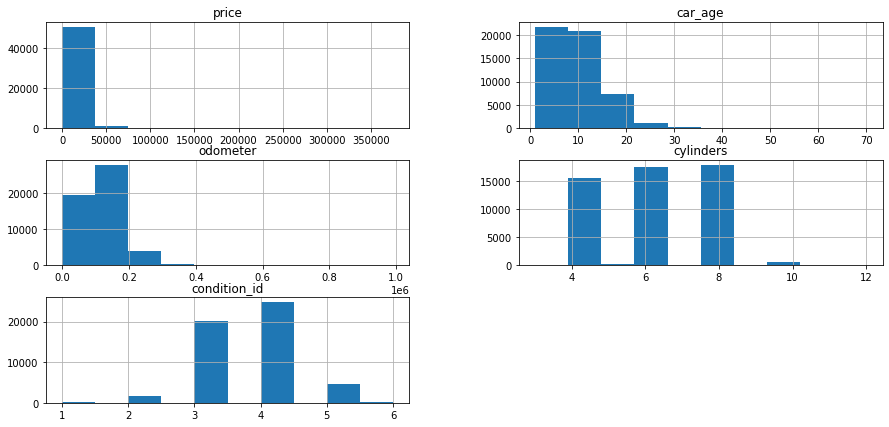

In [68]:
# Histogram group:
# Let's call the '.hist()' function using double square brackets to optimize a histogram creation of the 5 variables

df[['price', 'car_age', 'odometer', 'cylinders', 'condition_id']].hist(figsize=(15, 7))
plt.show()

With a brief observation we can already see that, in at least three columns: `price`, `car_age` and `odometer`, we have almost all the values badly distributed, being concentrated in less than half of the data.

Let's analyze each one more carefully, but now limiting its scope:

**Price**

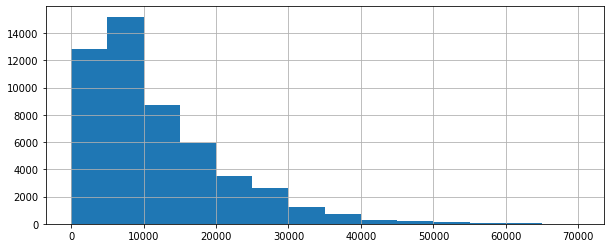

In [69]:
# Let's limit car prices to 70k and see how they spread out:

df['price'].hist(bins= 14, figsize=(10, 4), range=(0, 70000))

plt.show()

In [70]:
# Let's filter this data to see if it really makes sense:

df.query('price > 70000').sort_values(by='price', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,condition_id,fuel_id,transmission_id,type_id,paint_color_id,weekday_posted,month_posted,year_posted,car_age,mileage_year
12504,375000,1999,nissan frontier,good,6,gas,115000,automatic,pickup,blue,...,3,5,3,10,8,5,5,2018,20,5750.000000
11359,300000,2015,ram 2500,excellent,8,diesel,130356,automatic,truck,grey,...,4,4,3,12,9,0,10,2018,4,32589.000000
1309,189000,2014,ford f-150,good,6,gas,151248,automatic,truck,black,...,3,5,3,12,11,5,3,2019,6,25208.000000
34389,189000,2014,ford f-150,good,6,gas,151248,automatic,truck,black,...,3,5,3,12,11,5,2,2019,6,25208.000000
33434,189000,2014,ford f-150,good,6,gas,151248,automatic,truck,black,...,3,5,3,12,11,1,2,2019,6,25208.000000
30634,189000,2014,ford f-150,good,6,gas,121928,automatic,truck,black,...,3,5,3,12,11,5,7,2018,5,24385.600000
27375,189000,2014,ford f-150,good,6,gas,151248,automatic,truck,black,...,3,5,3,12,11,1,9,2018,5,30249.600000
1668,189000,2014,ford f-150,good,6,gas,151248,automatic,truck,unknown,...,3,5,3,12,13,2,3,2019,6,25208.000000
34206,175000,2004,gmc sierra 2500hd,good,8,diesel,149000,automatic,truck,grey,...,3,4,3,12,9,5,8,2018,15,9933.333333
41748,145000,2008,toyota tundra,like new,8,gas,140000,automatic,truck,red,...,5,5,3,12,7,5,6,2018,11,12727.272727


There they are. The 28 vehicles responsible for widening the range of our price data beyond the majority (over 50k) priced below 70k.

What stands out about this data set:
- A 'frontier' 1999 will be the most expensive in the DataFrame, even more than the 'ram 2500' from 2015;
- Some 'ford f-150' with the same price, year, and more surprising: same mileage;
- Coincidentally, some data are repeated, but mainly the price with a value equal to 123456 for 3 units of the 'chevrolet suburban';
- Most vehicles advertised above 120,000 are causing suspicion.

**Age**

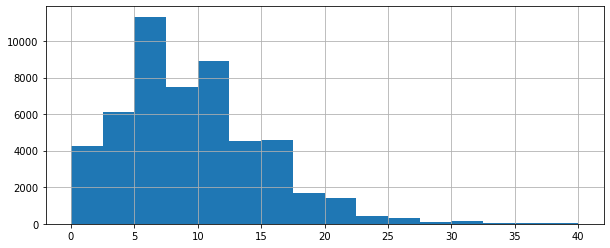

In [71]:
# Let's limit cars aged up to 40 years and see how they are distributed:

df['car_age'].hist(bins= 16, figsize=(10, 4), range=(0, 40))

plt.show()

In [72]:
# Let's filter this data to see if it really makes sense:

df.query('car_age > 40').sort_values(by='car_age', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,condition_id,fuel_id,transmission_id,type_id,paint_color_id,weekday_posted,month_posted,year_posted,car_age,mileage_year
36582,44900,1949,chevrolet suburban,good,4,gas,1800,automatic,wagon,orange,...,3,5,3,8,2,6,8,2018,70,25.714286
14752,15000,1954,ford f-150,excellent,8,gas,3565,manual,pickup,black,...,4,5,2,10,11,5,2,2019,66,54.015152
10018,23900,1955,ford f250,excellent,6,gas,47180,manual,truck,blue,...,4,5,2,12,8,5,12,2018,64,737.187500
48414,37900,1958,chevrolet impala,good,8,gas,62799,automatic,coupe,unknown,...,3,5,3,9,13,5,8,2018,61,1029.491803
39580,35000,1958,chevrolet impala,excellent,8,gas,3184,automatic,coupe,black,...,4,5,3,9,11,5,5,2018,61,52.196721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,11900,1978,chevrolet corvette,good,8,gas,73411,automatic,coupe,silver,...,3,5,3,9,10,3,10,2018,41,1790.512195
26817,16900,1979,chevrolet corvette,excellent,8,gas,105000,automatic,coupe,red,...,4,5,3,9,7,2,2,2019,41,2560.975610
4619,18500,1979,chevrolet corvette,good,8,gas,45636,manual,coupe,black,...,3,5,2,9,11,2,1,2019,41,1113.073171
25726,13500,1978,chevrolet corvette,good,8,gas,74163,automatic,coupe,silver,...,3,5,3,9,10,6,8,2018,41,1808.853659


As for these, we see 172 vehicles with more than 40 years of manufacture.

They appear more difficult to find trends in typos or suspicious data.

**Odometer**

In [73]:
# Let's statistically analyze the 'odometer' column

df['odometer'].describe()

count     51520.000000
mean     115345.401805
std       60614.043708
min           0.000000
25%       77119.500000
50%      115532.000000
75%      148177.000000
max      990000.000000
Name: odometer, dtype: float64

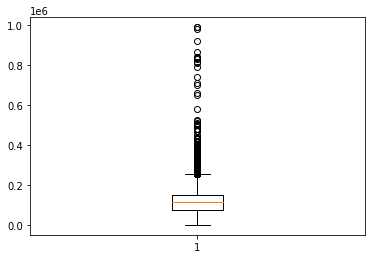

In [74]:
# Let's create a box plot to highlight the 'outliers'
# and analyze the distribution of the cars that seem to have the most mileage:

plt.boxplot(df['odometer']);

We see that the 'y-axis' has been abbreviated to six leading zeros for decimals as the numbers would get too large on the graph.

Apparently most of the data are found with `odometer` values lower than 250 thousand and what comes above that may be "outside the curve" points.

Let's see in more detail if this is true and how many there are:

(0.0, 260000.0)

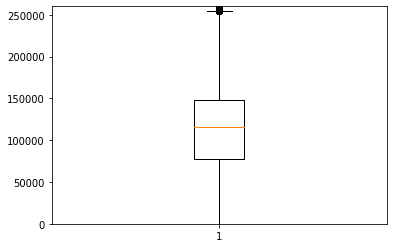

In [75]:
plt.boxplot(df['odometer']);
plt.ylim(0, 260000)

In [76]:
df.query('odometer > 254000').sort_values(by='odometer', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,condition_id,fuel_id,transmission_id,type_id,paint_color_id,weekday_posted,month_posted,year_posted,car_age,mileage_year
40729,4700,2013,chevrolet cruze,good,6,gas,990000,automatic,sedan,black,...,3,5,3,11,11,2,5,2018,6,165000.000000
17869,59900,1964,chevrolet corvette,like new,8,gas,990000,automatic,convertible,red,...,5,5,3,4,7,6,6,2018,55,18000.000000
48962,40000,2014,ram 3500,excellent,8,diesel,980000,automatic,truck,white,...,4,4,3,12,12,3,12,2018,5,196000.000000
14245,6000,1996,ram 2500,good,10,gas,920000,automatic,truck,blue,...,3,5,3,12,8,5,2,2019,24,38333.333333
2840,18500,2014,ford explorer,excellent,6,gas,866000,automatic,SUV,black,...,4,5,3,13,11,4,7,2018,5,173200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,6000,2004,toyota 4runner,good,8,gas,254200,automatic,SUV,unknown,...,3,5,3,13,13,6,12,2018,15,16946.666667
46716,3450,2011,chevrolet impala,good,6,gas,254123,automatic,sedan,grey,...,3,5,3,11,9,6,11,2018,8,31765.375000
44311,10000,2008,ford f-250 super duty,good,8,diesel,254100,automatic,pickup,red,...,3,4,3,10,7,6,12,2018,11,23100.000000
23963,4950,2004,chevrolet tahoe,excellent,8,gas,254099,automatic,SUV,silver,...,4,5,3,13,10,3,1,2019,16,15881.187500


For cars of the year 1964, as we see the 'chevrolet corvette', perhaps it would even be expected to reach an odometer close to 1 million.

But of our 51520 lines of code, 972 are practically "alone", changing our distribution above 254,000 .

## Studying and caring for outliers

Given the above results, let's determine which columns should contain outliers and create **a DataFrame for each** without those outliers:

**Vehicle price**

In [77]:
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
iqr_price = q3_price - q1_price

# Determining the lower bound for outliers
lower_limit_price = q1_price - 1.5*iqr_price

# Determining the upper bound for outliers
upper_limit_price = q3_price + 1.5*iqr_price

# Storing the data without the outliers in a separate DataFrame
df_price = df.loc[(df['price'] > lower_limit_price) & (df['price'] < upper_limit_price)]

**Vehicle age**

In [78]:
q1_age = df['car_age'].quantile(0.25)
q3_age = df['car_age'].quantile(0.75)
iqr_age = q3_age - q1_age

# Determining the lower bound for outliers
lower_limit_age = q1_age - 1.5*iqr_age

# Determining the upper bound for outliers
upper_limit_age = q3_age + 1.5*iqr_age

# Storing the data without the outliers in a separate DataFrame
df_age = df.loc[(df['car_age'] > lower_limit_age) & (df['car_age'] < upper_limit_age)]

**Odometer**

In [79]:
q1_odometer = df['odometer'].quantile(0.25)
q3_odometer = df['odometer'].quantile(0.75)
iqr_odometer = q3_odometer - q1_odometer

# Determining the lower bound for outliers
lower_limit_odometer = q1_odometer - 1.5*iqr_odometer

# Determining the upper bound for outliers
upper_limit_odometer = q3_odometer + 1.5*iqr_odometer

# Storing the data without the outliers in a separate DataFrame
df_odometer = df.loc[(df['odometer'] > lower_limit_odometer) & (df['odometer'] < upper_limit_odometer)]

## Studying the fundamental parameters without outliers

Let's now use the filtered data to make new charts.

We should look at the ones we created earlier ( # Histogram group ) and draw a comparison between those that include the outliers and those that do not consider them.

Let's draw conclusions for each:

**Prices**

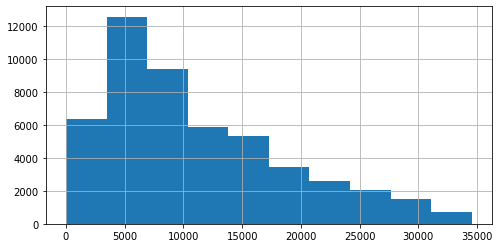

In [80]:
# We call the '.hist()' function now specifically for 'df_price', the new DataFrame targeting the typical values

df_price['price'].hist(figsize=(8, 4))
plt.show()

The histogram for our filtered data looks much more like something you would expect for car prices, gradually decreasing the amount of these with high values, which suggests that it is closer to reality than the raw data histogram.

This means that we were right to remove superfluous and unrealistic values.

**Vehicle age**

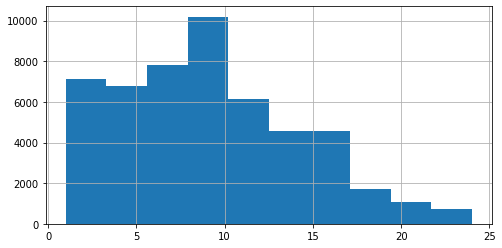

In [81]:
# We call the '.hist()' function now specifically for 'df_age', the new DataFrame targeting the typical values

df_age['car_age'].hist(figsize=(8, 4))
plt.show()

In the first histogram of `car_age` it was evident the concentration of vehicle age values for less than half of the graph.

They are now spaced out and evenly distributed, which suggests greater reasonableness in the DataFrame.

**Mileage**

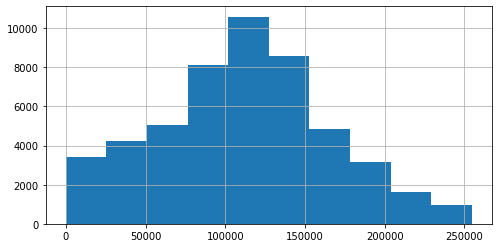

In [82]:
# We call the '.hist()' function now specifically for 'df_odometer', the new DataFrame targeting the typical values

df_odometer['odometer'].hist(figsize=(8, 4))
plt.show()

`odometer` was also a concentrated dataset on the left, less than half of the graph, with plenty of space on the right.

This mountain-like design even makes you want to climb, with the feeling that it is something natural, with many cars run between 100 and 150 thousand miles and others gradually distributed for less and more.

Perhaps it is worth considering this to continue our analysis.

## Ad lifetime

We will study the number of days the advertisements were displayed (`days_listed`).

Let's calculate the mean and median via the `describe` method and create a histogram to describe the typical lifetime of an advertisement.

Let's also try to determine when advertisements were removed quickly, and when they were listed for an unusually long time.

In [83]:
# Statistically describing the data in column df['days_listed']:

df['days_listed'].describe()

count    51520.000000
mean        39.555648
std         28.205041
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

We can already see that the average number of days that advertisements were announced was 39.5, while the median was 33.

Apparently the vehicles take about a month to sell.

But probably the maximum value of 271 days is responsible for the gap between these first two values.

Let's try to find out more details with a histogram:

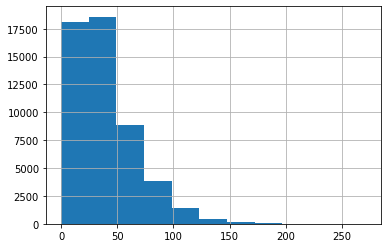

In [84]:

df['days_listed'].hist(bins=11);


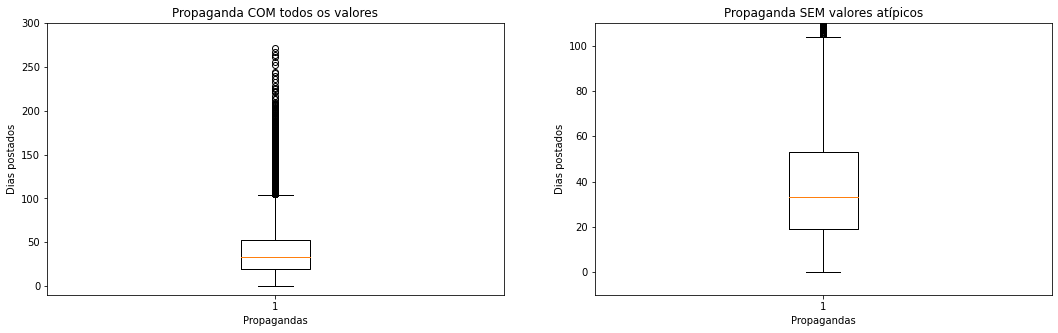

In [85]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Plotting the boxplots in the subplots
ax1.boxplot(df['days_listed'])
ax2.boxplot(df['days_listed'])

# Defining y-axis bounds for each subplot
ax1.set_ylim(-10, 300) # Setting y-axis limits for subplot 1
ax2.set_ylim(-10, 110) # Setting y-axis limits for subplot 2

# Defining the titles and labels
ax1.set_title("Advertisement WITH all values")
ax1.set_xlabel("Advertisements")
ax1.set_ylabel("Posted days")
ax2.set_title("Advertisement WITHOUT outliers")
ax2.set_xlabel("Advertisements")
ax2.set_ylabel("Days posted")

# Showing the chart
plt.show()

Both the histograms and the box plots confirmed what we could predict with the describe method, about most advertisements being posted distributedly between 19 and 53 days, that is, their **lifetime** is certain to **34 days** (53 - 19).

We had some already removed on the first day of the announcement and others that, still within typical values, up to about 110 days.

Above that were outliers.

## Average prices for each type of vehicle

Continuing with our DataFrame filtered for prices without outliers (`df_price`), let's analyze the number of advertisements and the average price `price` for each type of vehicle `type`.

To do so, we'll make a pivot_table with these two values (`ads_per_type` and `price_per_type`) and select the two types with the highest number of advertisements.

Next, we will build a graph showing the dependence of the number of advertisements on the type of vehicle.

In [86]:
# Creating a pivot table indexed by vehicle type, which counts advertisements and finds average prices

price_by_type = df_price.pivot_table(
     index='type', values='price', aggfunc=['count', 'mean']
)

# Renaming the columns

price_by_type.columns = ['ads_per_type', 'price_per_type']

# Sort by number of advertisements

price_by_type.sort_values(by= 'ads_per_type', ascending=False)

,ads_per_type,price_per_type
type,,
sedan,12146,6941.192162
SUV,12098,10351.449413
truck,11550,14820.840606
pickup,6621,14611.193475
coupe,2226,13269.010782
wagon,1531,8880.496408
mini-van,1157,8004.687986
hatchback,1046,6841.620459
van,591,8743.340102


Among the vehicle types with the highest number of advertisements, we have `sedan` and `SUV` with their average prices of '6941.19' and '10351.44', respectively.

Let's create a scatter plot across all types, their ad count, and average prices to see if there's any direct relationship:

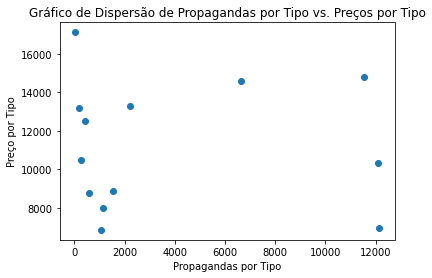

In [87]:
# Creating the scatter plot

plt.scatter(price_by_type['ads_per_type'], price_by_type['price_per_type'])

# Defining the chart title and axis names

plt.title('Ad Scatter Chart by Type vs. Prices by Type')

plt.xlabel('Ads by Type')

plt.ylabel('Price by Type')

# Showing the chart

plt.show()

Price per `type` and number of advertisements do not seem to be correlated.

Let's look next for more possibly driving factors.

## Price Factors

What factors impact the price the most?

We will base ourselves on the most popular types of `sedan` and `SUV` that we detected in the previous stage to study whether the price depends on the age, mileage, condition, type of transmission and color of the vehicle.

These `sedan` and `SUV` types are identified in the `type_id` column respectively with the numbers: 11 and 13.

For the numerical variables (`car_age` and `odometer`) we will create scatterplots.

For categorical variables (like `condition`, `transmission` and `paint_color`), we'll build extremes and quartiles plots.

For the parameters to be valid for analysis, when we analyze the categorical variables, we will select categories that have at least 50 advertisements.

First of all, let's start by making use of a specific **correlation matrix** for the data we want to focus on.

In [88]:
# Filtering in df_price a new Dataframe, df_sedan_suv, that contains only SUV or sedan in the rows of column 'type_id'

df_sedan_suv = df_price.query('(type_id == 11) or (type_id == 13)')

# Creating the correlation matrix between all columns of 'df_sedan_suv'

# Let's sort from the variable that most correlates to the one that least correlates with 'price'

df_sedan_suv.corr().sort_values(by = 'price', ascending=False)

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,fuel_id,transmission_id,type_id,paint_color_id,weekday_posted,month_posted,year_posted,car_age,mileage_year
price,1.000000,0.500198,0.122445,-0.409055,0.256278,-0.010130,0.257492,-0.012564,0.052092,0.279845,0.078682,0.005419,-0.009261,0.006631,-0.497975,0.195851
model_year,0.500198,1.000000,-0.239127,-0.520487,-0.102352,-0.011054,0.308853,-0.019130,0.047311,-0.113846,0.100501,-0.000539,-0.014820,0.010188,-0.995836,0.439302
type_id,0.279845,-0.113846,0.500160,0.114434,0.683784,0.006079,-0.015988,0.088126,0.005497,1.000000,-0.003250,0.002259,0.001389,0.004895,0.113924,-0.013376
condition_id,0.257492,0.308853,-0.070945,-0.297325,-0.015327,-0.012580,1.000000,-0.022171,0.012948,-0.015988,0.040593,0.001072,-0.003194,0.005657,-0.307338,0.080078
is_4wd,0.256278,-0.102352,0.431211,0.082778,1.000000,0.002344,-0.015327,0.065986,-0.075915,0.683784,-0.014221,0.004661,0.001482,-0.000033,0.102018,-0.017872
mileage_year,0.195851,0.439302,-0.075805,0.199200,-0.017872,-0.004004,0.080078,0.007993,0.021470,-0.013376,0.049499,0.001838,0.083873,-0.107204,-0.447654,1.000000
cylinders,0.122445,-0.239127,1.000000,0.190174,0.431211,0.012117,-0.070945,0.069738,-0.070062,0.500160,0.025665,-0.007199,-0.003086,0.002859,0.238614,-0.075805
paint_color_id,0.078682,0.100501,0.025665,-0.045178,-0.014221,-0.001362,0.040593,-0.014789,0.037705,-0.003250,1.000000,-0.008704,0.005422,-0.004460,-0.100583,0.049499
transmission_id,0.052092,0.047311,-0.070062,0.022545,-0.075915,-0.001495,0.012948,-0.005842,1.000000,0.005497,0.037705,-0.001978,-0.000939,-0.002700,-0.047404,0.021470
year_posted,0.006631,0.010188,0.002859,-0.007403,-0.000033,0.006373,0.005657,0.004285,-0.002700,0.004895,-0.004460,-0.012210,-0.817735,1.000000,0.081017,-0.107204


By looking at the first six lines of this matrix, we can see that, directly or inversely proportionally, `model_year` is the variable that **most correlates** with `price`, followed by `car_age`, `odometer`, ` type_id`, `condition_id` and `is_4wd`.

Apparently `transmission_id` and `paint_color_id` have a **very low correlation**.

Let's create some graphics to visualize this in a more tangible way.

**Scatter plots for the numeric variable `car_age`**

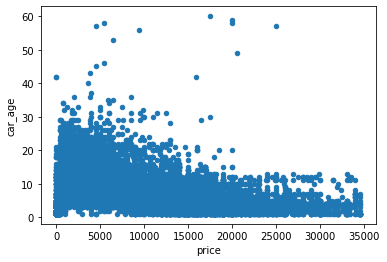

In [89]:

df_sedan_suv.plot.scatter(x = 'price', y = 'car_age');

There is a gentle gradual slope here where we realize that the older the car, the lower its price.


Typically, the older the vehicle, the lower its price tends to be. This is due to natural wear and tear over time, including depreciation in resale value.

**Scatter plots for the numerical variable `odometer`**

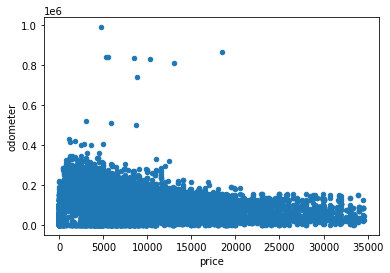

In [90]:

df_sedan_suv.plot.scatter(x = 'price', y = 'odometer');

The mileage traveled by the vehicle is also an important factor that can impact the price. Generally, the higher the mileage, the lower the price of the vehicle tends to be, since it has been used more and may have more mechanical wear and tear.

At a slightly less pronounced angle than in the previous graph, here we also see that the more mileage the car has, the lower its price.

**Boxplot graph for categorical variable `condition`**

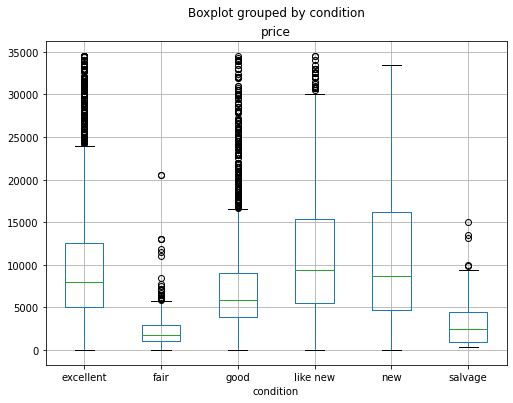

In [91]:
# Filter data based on 'condition' count
condition_counts = df_sedan_suv['condition'].value_counts()
conditions_to_include = condition_counts[condition_counts >= 50].index
df_filtered = df_sedan_suv[df_sedan_suv['condition'].isin(conditions_to_include)]

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
df_filtered.boxplot('price', by='condition', ax=ax)

# Display the chart
plt.show()

The condition of the vehicle, which can be categorized as new, excellent, good, fair or salvage, can also influence the price. Vehicles in better condition tend to have a higher price.

It was exactly what we could see: new and used cars tend to be more expensive, as well as acceptable and cheaper scrap.

**Boxplot plot for categorical variable `transmission`**

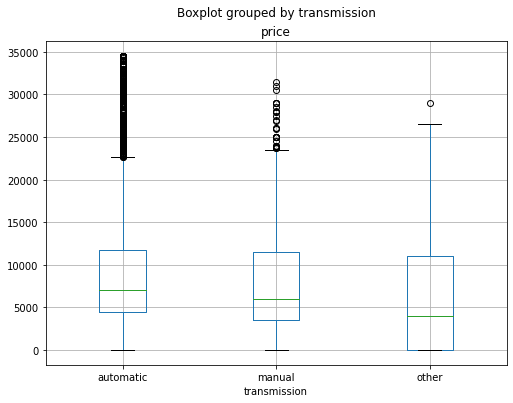

In [92]:
# Filter data based on 'transmission' count
transmission_counts = df_sedan_suv['transmission'].value_counts()
transmissions_to_include = transmission_counts[transmission_counts >= 50].index
df_filtered = df_sedan_suv[df_sedan_suv['transmission'].isin(transmissions_to_include)]

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
df_filtered.boxplot('price', by='transmission', ax=ax)

# show the chart
plt.show()

The vehicle's transmission, which may be automatic, manual or another category, can also impact the price. Some types of transmission may be more valued in certain market segments.

In this context where our vehicles are presented, automatics have a slight tendency to be more expensive than manual transmissions.

**Boxplot graph for categorical variable `paint_color`**

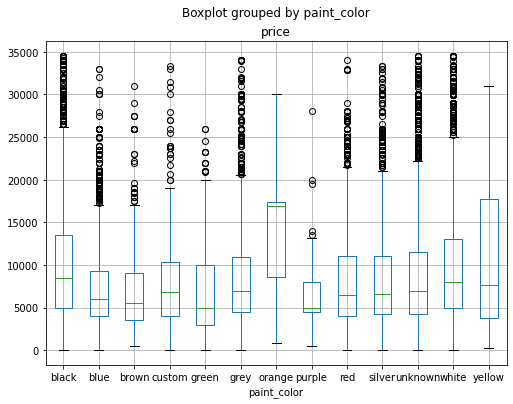

In [93]:
# Filter data based on 'paint_color' count
paint_color_counts = df_sedan_suv['paint_color'].value_counts()
paint_colors_to_include = paint_color_counts[paint_color_counts >= 50].index
df_filtered = df_sedan_suv[df_sedan_suv['paint_color'].isin(paint_colors_to_include)]

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
df_filtered.boxplot('price', by='paint_color', ax=ax)

# Display the chart
plt.show()

Vehicle color can also have an impact on price, as some colors may be more popular or desirable than others.

In our case, apparently, orange cars tend to be more expensive, while purple and green are cheaper.

## Overall conclusion

We studied the following parameters: price, age of the vehicle when the advertisement was placed, mileage, number of cylinders and condition. We constructed histograms for each of these parameters. We studied how outliers affect the shape and readability of histograms.

We determine the upper bounds of outliers, remove the outliers, store them in a separate DataFrame, and continue our work with the filtered data.

We use the filtered data to build new histograms. Comparing them with previous histograms (those that include outliers), we draw conclusions for each histogram.

We studied how many days the advertisements were displayed (days_listed). We construct a histogram and calculate the mean and median. We describe the typical lifetime of an advertisement, determining when advertisements were removed quickly and when they were listed for an unusually long time.

We analyzed the number of advertisements and the average price for each type of vehicle. We built a graph showing the dependence of the number of advertisements on the type of vehicle.

We selected the two types with the highest number of advertisements, SUV and sedan, to continue with further analysis.

We identify the factors that most influence the price. We analyze SUV's and sedan's and study whether for them the price depends on age, mileage, condition, type of transmission and color.

For categorical variables (transmission type and color), we plot extremes and quartiles, and create scatterplots for the rest.

Considering our initial intentions, we can say that, within the conditions that we analyzed as determinants for the sale price of a vehicle, the main variables to be considered are: age of the car, its mileage and its type. Color and transmission are not very determinant, but among them orange cars with automatic transmission tend to be more expensive.